# Data Modeling

This notebook carries out basic data modeling of the [Dataset of songs in Spotify](https://www.kaggle.com/datasets/mrmorj/dataset-of-songs-in-spotify); then, this data modeling is trasferred to production-level code in the components placed in the uper level of this folder.

Note that the present notebook is not tracked with Weights and Biases. To see how to track notebooks, have a look at [`EDA_Tracked.ipynb`](EDA_Tracked.ipynb).

Overview of contents:

1. [Basic EDA](#1.-basic-eda)
2. [Preprocessing: Basic Cleaning and Feature Engineering](#2.-Preprocessing:-Basic-Cleaning-and-Feature Engineering)
3. C

## 1. Basic EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_parquet('../dataset/genres_mod.parquet')

In [3]:
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,genre,song_name,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,audio_features,124539,4,Dark Trap,Mercury: Retrograde,None
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,audio_features,224427,4,Dark Trap,Pathology,None
2,0.850,0.893,5,NaN,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,audio_features,98821,4,Dark Trap,Symbiote,None
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,audio_features,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),None
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,audio_features,123298,4,Dark Trap,Venom,None


In [10]:
# Missing values in
# - loudness
# - song_name
# - title (album?)
df.info()s

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42896 entries, 0 to 42895
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42896 non-null  float64
 1   energy            42896 non-null  float64
 2   key               42896 non-null  int64  
 3   loudness          33726 non-null  float64
 4   mode              42896 non-null  int64  
 5   speechiness       42896 non-null  float64
 6   acousticness      42896 non-null  float64
 7   instrumentalness  42896 non-null  float64
 8   liveness          42896 non-null  float64
 9   valence           42896 non-null  float64
 10  tempo             42896 non-null  float64
 11  type              42896 non-null  object 
 12  duration_ms       42896 non-null  int64  
 13  time_signature    42896 non-null  int64  
 14  genre             42896 non-null  object 
 15  song_name         21811 non-null  object 
 16  title             21079 non-null  object

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
danceability,42896.0,0.639336,0.156585,0.065100,0.52400,0.64600,0.7660,0.988
energy,42896.0,0.762560,0.183691,0.000243,0.63200,0.80300,0.9230,1.000
key,42896.0,5.368566,3.664993,0.000000,1.00000,6.00000,9.0000,11.000
loudness,33726.0,-6.463899,2.938171,-32.929000,-8.16500,-6.22850,-4.5200,3.148
mode,42896.0,0.549492,0.497550,0.000000,0.00000,1.00000,1.0000,1.000
speechiness,42896.0,0.136446,0.125976,0.022700,0.04910,0.07540,0.1930,0.946
acousticness,42896.0,0.096260,0.170843,0.000001,0.00173,0.01640,0.1070,0.988
instrumentalness,42896.0,0.283229,0.370810,0.000000,0.00000,0.00596,0.7220,0.989
liveness,42896.0,0.214080,0.175463,0.010700,0.09960,0.13500,0.2940,0.988
valence,42896.0,0.357170,0.233255,0.018700,0.16100,0.32200,0.5220,0.988


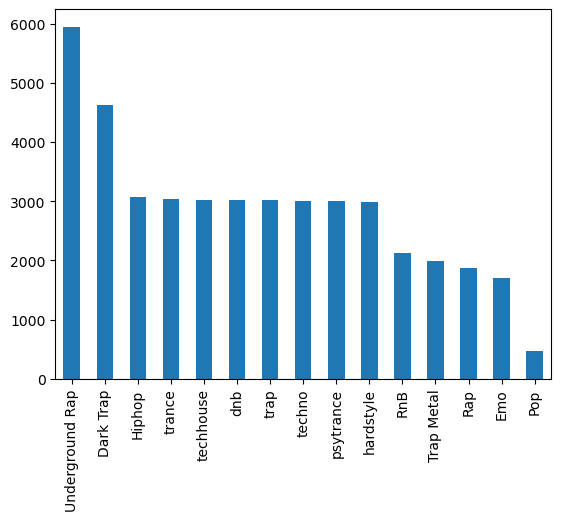

In [8]:
df['genre'].value_counts().plot(kind='bar')

In [14]:
df['song_name']

0                                  Mercury: Retrograde
1                                            Pathology
2                                             Symbiote
3        ProductOfDrugs (Prod. The Virus and Antidote)
4                                                Venom
                             ...                      
42891                                       Bang Bros!
42892                                             None
42893                                             None
42894                               Southern Hostility
42895                                             None
Name: song_name, Length: 42896, dtype: object

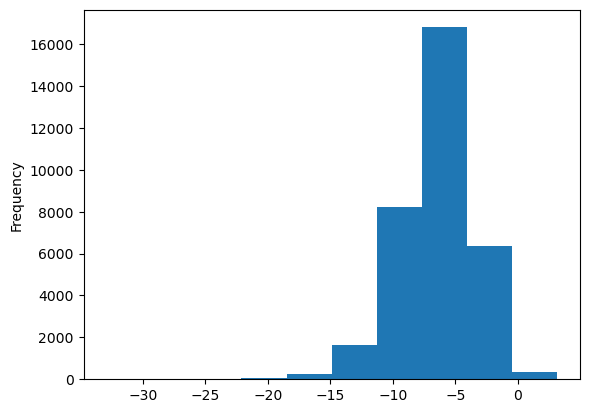

In [13]:
df['loudness'].plot(kind='hist')

## 2. Preprocessing: Basic Cleaning and Feature Engineering

This basic preprocessing should not include anything sophisticated nor anything that should be applied to new incoming datapoints; those transformations should go into the processing part of the inference pipeline.

In [15]:
# Remove duplicates
df = df.drop_duplicates().reset_index(drop=True)

In [17]:
# A minimal feature engineering step: a new feature = song name + title
df['title'].fillna(value='', inplace=True)
df['song_name'].fillna(value='', inplace=True)
df['text_feature'] = df['title'] + ' ' + df['song_name']